In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt
import pickle

In [3]:
basedir = 'dataset'

In [4]:
from deep_visual_odometry.odometry_model_v2 import OdomModelV2

In [5]:
batch_size = 32         # Sequences per batch
num_steps = 16         # Number of sequence steps per batch
rnn_size = 400          # Size of hidden layers in rnn_cell
num_layers = 4           # Number of hidden layers
learning_rate = 0.001   #learning rate

In [6]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['00', '01', '02', '03','04','05','06','07','08'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data
completed load sequence 02 data
completed load sequence 03 data
completed load sequence 04 data
completed load sequence 05 data
completed load sequence 06 data
completed load sequence 07 data
completed load sequence 08 data


In [7]:
kitti_data.normalize()

normalized data


In [37]:
model = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (32, 16, 3)
shape of targets (32, 16, 3)
odometry model initialized


In [39]:
loss = model.train(kitti_data, max_count = 2500, save_every_n = 100, sequences = ['00', '02', '05', '08'])

training .. 
step: 1  loss: 4.8435  2.2717 sec/batch
step: 2  loss: 4.6314  0.2805 sec/batch
step: 3  loss: 4.6150  0.2822 sec/batch
step: 4  loss: 4.3814  0.2802 sec/batch
step: 5  loss: 4.1974  0.2818 sec/batch
step: 6  loss: 4.1873  0.2798 sec/batch
step: 7  loss: 4.0386  0.2678 sec/batch
step: 8  loss: 4.0353  0.2798 sec/batch
step: 9  loss: 3.9488  0.2798 sec/batch
step: 10  loss: 3.9655  0.2795 sec/batch
step: 11  loss: 3.8170  0.2700 sec/batch
step: 12  loss: 3.7876  0.2614 sec/batch
step: 13  loss: 3.8076  0.2690 sec/batch
step: 14  loss: 3.6113  0.2701 sec/batch
step: 15  loss: 3.5947  0.2695 sec/batch
step: 16  loss: 3.6063  0.2727 sec/batch
step: 17  loss: 3.5215  0.2688 sec/batch
step: 18  loss: 3.4600  0.2714 sec/batch
step: 19  loss: 3.3557  0.2666 sec/batch
step: 20  loss: 3.3058  0.2673 sec/batch
step: 21  loss: 3.2793  0.2716 sec/batch
step: 22  loss: 3.2976  0.2707 sec/batch
step: 23  loss: 3.2560  0.2700 sec/batch
step: 24  loss: 3.1734  0.2636 sec/batch
step: 25  lo

step: 199  loss: 1.7705  0.2582 sec/batch
step: 200  loss: 1.6923  0.2599 sec/batch
step: 201  loss: 1.6971  0.2505 sec/batch
step: 202  loss: 1.6240  0.2493 sec/batch
step: 203  loss: 1.7500  0.2520 sec/batch
step: 204  loss: 1.7000  0.2528 sec/batch
step: 205  loss: 1.6824  0.2506 sec/batch
step: 206  loss: 1.6418  0.2493 sec/batch
step: 207  loss: 1.6435  0.2474 sec/batch
step: 208  loss: 1.7004  0.2505 sec/batch
step: 209  loss: 1.6454  0.2516 sec/batch
step: 210  loss: 1.6482  0.2499 sec/batch
step: 211  loss: 1.7172  0.2512 sec/batch
step: 212  loss: 1.6552  0.2429 sec/batch
step: 213  loss: 1.5838  0.2498 sec/batch
step: 214  loss: 1.6598  0.2515 sec/batch
step: 215  loss: 1.6452  0.2486 sec/batch
step: 216  loss: 1.6853  0.2442 sec/batch
step: 217  loss: 1.5836  0.2494 sec/batch
step: 218  loss: 1.6179  0.2505 sec/batch
step: 219  loss: 1.6417  0.2401 sec/batch
step: 220  loss: 1.7720  0.2493 sec/batch
step: 221  loss: 1.6660  0.2558 sec/batch
step: 222  loss: 1.6066  0.2423 se

step: 395  loss: 1.1550  0.2530 sec/batch
step: 396  loss: 1.1075  0.2483 sec/batch
step: 397  loss: 1.2209  0.2421 sec/batch
step: 398  loss: 1.1284  0.2414 sec/batch
step: 399  loss: 1.1650  0.2510 sec/batch
step: 400  loss: 1.1995  0.2508 sec/batch
step: 401  loss: 1.2271  0.2594 sec/batch
step: 402  loss: 1.1921  0.2530 sec/batch
step: 403  loss: 1.1376  0.2505 sec/batch
step: 404  loss: 1.0734  0.2624 sec/batch
step: 405  loss: 1.2345  0.2698 sec/batch
step: 406  loss: 1.1834  0.2613 sec/batch
step: 407  loss: 1.2063  0.2706 sec/batch
step: 408  loss: 1.1561  0.2712 sec/batch
step: 409  loss: 1.1349  0.2533 sec/batch
step: 410  loss: 1.1433  0.2460 sec/batch
step: 411  loss: 1.1284  0.2622 sec/batch
step: 412  loss: 1.1875  0.2516 sec/batch
step: 413  loss: 1.1547  0.2509 sec/batch
step: 414  loss: 1.1315  0.2503 sec/batch
step: 415  loss: 1.2312  0.2556 sec/batch
step: 416  loss: 1.2219  0.2437 sec/batch
step: 417  loss: 1.2109  0.2448 sec/batch
step: 418  loss: 1.1641  0.2477 se

step: 591  loss: 0.8468  0.2632 sec/batch
step: 592  loss: 0.9640  0.2565 sec/batch
step: 593  loss: 0.8427  0.2560 sec/batch
step: 594  loss: 0.8370  0.2626 sec/batch
step: 595  loss: 0.8763  0.2437 sec/batch
step: 596  loss: 0.9620  0.2583 sec/batch
step: 597  loss: 0.8484  0.2522 sec/batch
step: 598  loss: 0.8734  0.2424 sec/batch
step: 599  loss: 0.9107  0.2427 sec/batch
step: 600  loss: 0.8414  0.2418 sec/batch
step: 601  loss: 0.8580  0.2546 sec/batch
step: 602  loss: 0.8228  0.2522 sec/batch
step: 603  loss: 0.8095  0.2482 sec/batch
step: 604  loss: 0.8857  0.2447 sec/batch
step: 605  loss: 0.7936  0.2542 sec/batch
step: 606  loss: 0.8344  0.2572 sec/batch
step: 607  loss: 0.8455  0.2594 sec/batch
step: 608  loss: 0.8901  0.2502 sec/batch
step: 609  loss: 0.8315  0.2636 sec/batch
step: 610  loss: 0.8541  0.2606 sec/batch
step: 611  loss: 0.7729  0.2666 sec/batch
step: 612  loss: 0.9498  0.2617 sec/batch
step: 613  loss: 0.8136  0.2596 sec/batch
step: 614  loss: 0.8744  0.2661 se

step: 787  loss: 0.6188  0.2496 sec/batch
step: 788  loss: 0.6809  0.2479 sec/batch
step: 789  loss: 0.7201  0.2466 sec/batch
step: 790  loss: 0.6410  0.2480 sec/batch
step: 791  loss: 0.6918  0.2497 sec/batch
step: 792  loss: 0.6449  0.2675 sec/batch
step: 793  loss: 0.6653  0.2529 sec/batch
step: 794  loss: 0.7479  0.2759 sec/batch
step: 795  loss: 0.6910  0.2625 sec/batch
step: 796  loss: 0.6543  0.2717 sec/batch
step: 797  loss: 0.5777  0.2573 sec/batch
step: 798  loss: 0.6863  0.2719 sec/batch
step: 799  loss: 0.6233  0.2558 sec/batch
step: 800  loss: 0.6459  0.2607 sec/batch
step: 801  loss: 0.6223  0.2480 sec/batch
step: 802  loss: 0.6091  0.2580 sec/batch
step: 803  loss: 0.6455  0.2575 sec/batch
step: 804  loss: 0.6332  0.2452 sec/batch
step: 805  loss: 0.6430  0.2579 sec/batch
step: 806  loss: 0.6453  0.2761 sec/batch
step: 807  loss: 0.6041  0.2516 sec/batch
step: 808  loss: 0.6417  0.2568 sec/batch
step: 809  loss: 0.6154  0.2614 sec/batch
step: 810  loss: 0.6322  0.2483 se

step: 983  loss: 0.5760  0.2450 sec/batch
step: 984  loss: 0.5560  0.2472 sec/batch
step: 985  loss: 0.5237  0.2583 sec/batch
step: 986  loss: 0.5262  0.2570 sec/batch
step: 987  loss: 0.5454  0.2556 sec/batch
step: 988  loss: 0.5300  0.2585 sec/batch
step: 989  loss: 0.4801  0.2555 sec/batch
step: 990  loss: 0.5517  0.2550 sec/batch
step: 991  loss: 0.5368  0.2484 sec/batch
step: 992  loss: 0.4426  0.2486 sec/batch
step: 993  loss: 0.5128  0.2389 sec/batch
step: 994  loss: 0.5305  0.2502 sec/batch
step: 995  loss: 0.6260  0.2575 sec/batch
step: 996  loss: 0.5639  0.2572 sec/batch
step: 997  loss: 0.4854  0.2477 sec/batch
step: 998  loss: 0.5079  0.2474 sec/batch
step: 999  loss: 0.6257  0.2473 sec/batch
step: 1000  loss: 0.5295  0.2482 sec/batch
step: 1001  loss: 0.5965  0.2451 sec/batch
step: 1002  loss: 0.6229  0.2514 sec/batch
step: 1003  loss: 0.5612  0.2519 sec/batch
step: 1004  loss: 0.4892  0.2516 sec/batch
step: 1005  loss: 0.5190  0.2514 sec/batch
step: 1006  loss: 0.5504  0.

step: 1174  loss: 0.4561  0.2536 sec/batch
step: 1175  loss: 0.4875  0.2543 sec/batch
step: 1176  loss: 0.4476  0.2548 sec/batch
step: 1177  loss: 0.4813  0.2626 sec/batch
step: 1178  loss: 0.3972  0.2532 sec/batch
step: 1179  loss: 0.4926  0.2424 sec/batch
step: 1180  loss: 0.3895  0.2511 sec/batch
step: 1181  loss: 0.4401  0.2523 sec/batch
step: 1182  loss: 0.3966  0.2456 sec/batch
step: 1183  loss: 0.4617  0.2431 sec/batch
step: 1184  loss: 0.3788  0.2466 sec/batch
step: 1185  loss: 0.4966  0.2499 sec/batch
step: 1186  loss: 0.3646  0.2500 sec/batch
step: 1187  loss: 0.4108  0.2421 sec/batch
step: 1188  loss: 0.4320  0.2457 sec/batch
step: 1189  loss: 0.4271  0.2515 sec/batch
step: 1190  loss: 0.4763  0.2673 sec/batch
step: 1191  loss: 0.4829  0.3223 sec/batch
step: 1192  loss: 0.3709  0.3323 sec/batch
step: 1193  loss: 0.4228  0.4787 sec/batch
step: 1194  loss: 0.4128  0.5477 sec/batch
step: 1195  loss: 0.4740  0.2767 sec/batch
step: 1196  loss: 0.4360  0.2676 sec/batch
step: 1197 

step: 1365  loss: 0.4551  0.2606 sec/batch
step: 1366  loss: 0.4426  0.2607 sec/batch
step: 1367  loss: 0.4528  0.2580 sec/batch
step: 1368  loss: 0.4162  0.2644 sec/batch
step: 1369  loss: 0.4463  0.2570 sec/batch
step: 1370  loss: 0.4368  0.2534 sec/batch
step: 1371  loss: 0.4033  0.2529 sec/batch
step: 1372  loss: 0.4296  0.2556 sec/batch
step: 1373  loss: 0.4079  0.2576 sec/batch
step: 1374  loss: 0.3543  0.2528 sec/batch
step: 1375  loss: 0.4586  0.2581 sec/batch
step: 1376  loss: 0.4246  0.2596 sec/batch
step: 1377  loss: 0.4149  0.2619 sec/batch
step: 1378  loss: 0.4025  0.2630 sec/batch
step: 1379  loss: 0.3630  0.2617 sec/batch
step: 1380  loss: 0.3897  0.2556 sec/batch
step: 1381  loss: 0.4360  0.2752 sec/batch
step: 1382  loss: 0.4074  0.2563 sec/batch
step: 1383  loss: 0.4461  0.2583 sec/batch
step: 1384  loss: 0.3887  0.2521 sec/batch
step: 1385  loss: 0.3230  0.2589 sec/batch
step: 1386  loss: 0.4014  0.2515 sec/batch
step: 1387  loss: 0.3711  0.2612 sec/batch
step: 1388 

step: 1556  loss: 0.3536  0.2701 sec/batch
step: 1557  loss: 0.3801  0.2554 sec/batch
step: 1558  loss: 0.3371  0.2522 sec/batch
step: 1559  loss: 0.3494  0.2545 sec/batch
step: 1560  loss: 0.2854  0.2546 sec/batch
step: 1561  loss: 0.3598  0.2611 sec/batch
step: 1562  loss: 0.3814  0.2625 sec/batch
step: 1563  loss: 0.3824  0.2523 sec/batch
step: 1564  loss: 0.4187  0.2477 sec/batch
step: 1565  loss: 0.3209  0.2565 sec/batch
step: 1566  loss: 0.3822  0.2604 sec/batch
step: 1567  loss: 0.3836  0.2615 sec/batch
step: 1568  loss: 0.3953  0.2624 sec/batch
step: 1569  loss: 0.3413  0.2543 sec/batch
step: 1570  loss: 0.3451  0.2624 sec/batch
step: 1571  loss: 0.4090  0.2574 sec/batch
step: 1572  loss: 0.3661  0.2567 sec/batch
step: 1573  loss: 0.3337  0.2569 sec/batch
step: 1574  loss: 0.3645  0.2562 sec/batch
step: 1575  loss: 0.3747  0.2531 sec/batch
step: 1576  loss: 0.4258  0.2482 sec/batch
step: 1577  loss: 0.3331  0.2536 sec/batch
step: 1578  loss: 0.3071  0.2524 sec/batch
step: 1579 

step: 1747  loss: 0.3262  0.2514 sec/batch
step: 1748  loss: 0.3419  0.2529 sec/batch
step: 1749  loss: 0.3577  0.2619 sec/batch
step: 1750  loss: 0.3993  0.2543 sec/batch
step: 1751  loss: 0.3342  0.2549 sec/batch
step: 1752  loss: 0.2997  0.2538 sec/batch
step: 1753  loss: 0.3718  0.2604 sec/batch
step: 1754  loss: 0.3647  0.2467 sec/batch
step: 1755  loss: 0.3456  0.2470 sec/batch
step: 1756  loss: 0.3912  0.2448 sec/batch
step: 1757  loss: 0.3428  0.2530 sec/batch
step: 1758  loss: 0.3133  0.2521 sec/batch
step: 1759  loss: 0.3619  0.2623 sec/batch
step: 1760  loss: 0.4062  0.2741 sec/batch
step: 1761  loss: 0.3975  0.3790 sec/batch
step: 1762  loss: 0.3719  0.3652 sec/batch
step: 1763  loss: 0.2997  0.2553 sec/batch
step: 1764  loss: 0.3759  0.4964 sec/batch
step: 1765  loss: 0.3331  0.3621 sec/batch
step: 1766  loss: 0.3307  0.2707 sec/batch
step: 1767  loss: 0.3604  0.2995 sec/batch
step: 1768  loss: 0.4329  0.2922 sec/batch
step: 1769  loss: 0.3628  0.3840 sec/batch
step: 1770 

step: 1938  loss: 0.3114  0.2525 sec/batch
step: 1939  loss: 0.3147  0.2609 sec/batch
step: 1940  loss: 0.2878  0.2524 sec/batch
step: 1941  loss: 0.3333  0.2511 sec/batch
step: 1942  loss: 0.2973  0.2613 sec/batch
step: 1943  loss: 0.3533  0.2645 sec/batch
step: 1944  loss: 0.2870  0.2633 sec/batch
step: 1945  loss: 0.2495  0.2639 sec/batch
step: 1946  loss: 0.3056  0.2642 sec/batch
step: 1947  loss: 0.2938  0.2632 sec/batch
step: 1948  loss: 0.3500  0.2618 sec/batch
step: 1949  loss: 0.2710  0.2620 sec/batch
step: 1950  loss: 0.3208  0.2610 sec/batch
step: 1951  loss: 0.2552  0.2610 sec/batch
step: 1952  loss: 0.3152  0.2548 sec/batch
step: 1953  loss: 0.3160  0.2452 sec/batch
step: 1954  loss: 0.3149  0.2608 sec/batch
step: 1955  loss: 0.3356  0.2644 sec/batch
step: 1956  loss: 0.2664  0.2471 sec/batch
step: 1957  loss: 0.3051  0.2621 sec/batch
step: 1958  loss: 0.3282  0.2623 sec/batch
step: 1959  loss: 0.3418  0.2627 sec/batch
step: 1960  loss: 0.3322  0.2597 sec/batch
step: 1961 

step: 2129  loss: 0.2791  0.2566 sec/batch
step: 2130  loss: 0.3186  0.2478 sec/batch
step: 2131  loss: 0.2501  0.2588 sec/batch
step: 2132  loss: 0.2627  0.2578 sec/batch
step: 2133  loss: 0.2761  0.2598 sec/batch
step: 2134  loss: 0.2427  0.2587 sec/batch
step: 2135  loss: 0.2619  0.2614 sec/batch
step: 2136  loss: 0.2654  0.2757 sec/batch
step: 2137  loss: 0.2569  0.2639 sec/batch
step: 2138  loss: 0.2787  0.3006 sec/batch
step: 2139  loss: 0.2622  0.2787 sec/batch
step: 2140  loss: 0.3268  0.2753 sec/batch
step: 2141  loss: 0.2759  0.2677 sec/batch
step: 2142  loss: 0.2888  0.2623 sec/batch
step: 2143  loss: 0.3193  0.2743 sec/batch
step: 2144  loss: 0.2838  0.2893 sec/batch
step: 2145  loss: 0.3041  0.2645 sec/batch
step: 2146  loss: 0.2592  0.2578 sec/batch
step: 2147  loss: 0.2767  0.2587 sec/batch
step: 2148  loss: 0.2703  0.2595 sec/batch
step: 2149  loss: 0.2917  0.2607 sec/batch
step: 2150  loss: 0.3239  0.2604 sec/batch
step: 2151  loss: 0.2522  0.2655 sec/batch
step: 2152 

step: 2320  loss: 0.2577  0.2530 sec/batch
step: 2321  loss: 0.2959  0.2515 sec/batch
step: 2322  loss: 0.2429  0.2482 sec/batch
step: 2323  loss: 0.2467  0.2536 sec/batch
step: 2324  loss: 0.2473  0.2499 sec/batch
step: 2325  loss: 0.3282  0.2582 sec/batch
step: 2326  loss: 0.3141  0.2550 sec/batch
step: 2327  loss: 0.2279  0.2555 sec/batch
step: 2328  loss: 0.2777  0.2582 sec/batch
step: 2329  loss: 0.2690  0.2573 sec/batch
step: 2330  loss: 0.2726  0.2595 sec/batch
step: 2331  loss: 0.2545  0.2590 sec/batch
step: 2332  loss: 0.2416  0.2501 sec/batch
step: 2333  loss: 0.3232  0.2592 sec/batch
step: 2334  loss: 0.2570  0.2564 sec/batch
step: 2335  loss: 0.3241  0.2458 sec/batch
step: 2336  loss: 0.3395  0.2562 sec/batch
step: 2337  loss: 0.3104  0.2517 sec/batch
step: 2338  loss: 0.2495  0.2491 sec/batch
step: 2339  loss: 0.2798  0.2585 sec/batch
step: 2340  loss: 0.2854  0.2573 sec/batch
step: 2341  loss: 0.2631  0.2582 sec/batch
step: 2342  loss: 0.3012  0.2584 sec/batch
step: 2343 

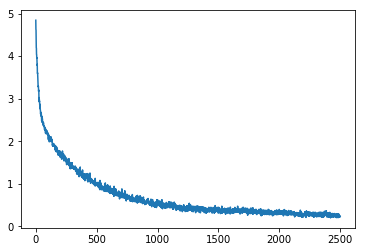

In [40]:
plt.plot(loss)

In [42]:
model_test = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)
odometry model initialized


In [49]:
seq = '00'
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = seq)
inter_inputs.shape

(4540, 5)

In [50]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model_test.test(checkpoint, inter_inputs)
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i2501_l400.ckpt


(4540, 3)

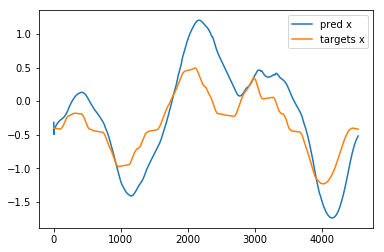

In [51]:
j = 0
plt.plot(predictions[:,j],label = 'pred x')
plt.plot(targets[:,j],label = 'targets x')
plt.legend()
plt.savefig('x_predictions_RNN_iter1000.jpg')
plt.show()

Text(0,0.5,'y')

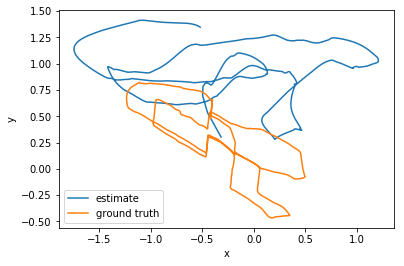

In [52]:

plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

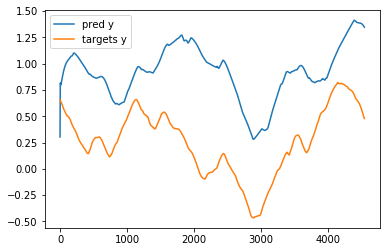

In [53]:
j = 1
plt.plot(predictions[:,j],label = 'pred y')
plt.plot(targets[:,j],label = 'targets y')
plt.legend()
plt.savefig('y_predictions_RNN_iter1000.jpg')
plt.show()

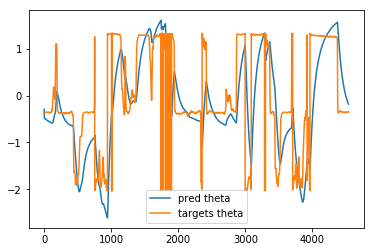

In [54]:
j = 2
plt.plot(predictions[:,j],label = 'pred theta')
plt.plot(targets[:,j],label = 'targets theta')
plt.legend()
plt.savefig('theta_predictions_RNN_iter1000.jpg')
plt.show()